In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.size']=12
import time

In [2]:
sns.set_style(rc = {'axes.facecolor': '#E8EFEF','figure.facecolor':'#E8EFEF'})

### Reading and Understanding the data

#### This data has been taken from UCI open Dataset and has been read using the read_csv function

In [3]:
url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url,encoding='latin1')

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.drop("name",axis=1,inplace=True)

In [6]:
df.shape

(195, 23)

The name column is just the subject name and recording number which is not relevent to our model so removing number

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

All the columns are of numerical dtype

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df_new = df.copy() # Creating a copy for comparision purpose

### Data PreProcessing

In [10]:
# Calculating the null values present
df.isna().sum(axis=0)

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<b>Insights:</b>
There are no null values in the dataset

In [11]:
# Checking for the duplicate values
df_new.drop_duplicates(subset=None,keep='first',inplace=True)

In [12]:
print(f"Shape before dropping duplicates: {df.shape} ")
print(f"Shape after dropping duplicates: {df_new.shape} ")

Shape before dropping duplicates: (195, 23) 
Shape after dropping duplicates: (195, 23) 


There are no duplicates in the dataset as the shape before and after dropping the duplicate is same

In [13]:
# Checking for the garbage values 
for col in df.columns:
    print(df[col].value_counts().sort_values(ascending=False))


119.992    1
122.964    1
91.904     1
116.682    1
116.676    1
          ..
201.774    1
174.188    1
209.516    1
174.688    1
214.289    1
Name: MDVP:Fo(Hz), Length: 195, dtype: int64
157.302    1
130.049    1
115.871    1
131.111    1
137.871    1
          ..
262.707    1
230.978    1
253.017    1
240.005    1
260.277    1
Name: MDVP:Fhi(Hz), Length: 195, dtype: int64
74.997     1
114.676    1
86.292     1
111.555    1
111.366    1
          ..
78.228     1
94.261     1
89.488     1
74.287     1
77.973     1
Name: MDVP:Flo(Hz), Length: 195, dtype: int64
0.00694    3
0.00369    3
0.00742    3
0.00462    2
0.00968    2
          ..
0.01360    1
0.00740    1
0.00517    1
0.00339    1
0.00567    1
Name: MDVP:Jitter(%), Length: 173, dtype: int64
0.000030    46
0.000040    28
0.000020    28
0.000010    20
0.000050    17
0.000060    16
0.000080     9
0.000070     8
0.000009     5
0.000090     5
0.000100     3
0.000110     2
0.000150     2
0.000007     1
0.000260     1
0.000120     1
0.0

There are no garbage values in the dataset

There are no categorical columns in the dataset, so no need to convert any columns into categorical columns

In [14]:
inference = df.groupby("status").mean()
inference

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


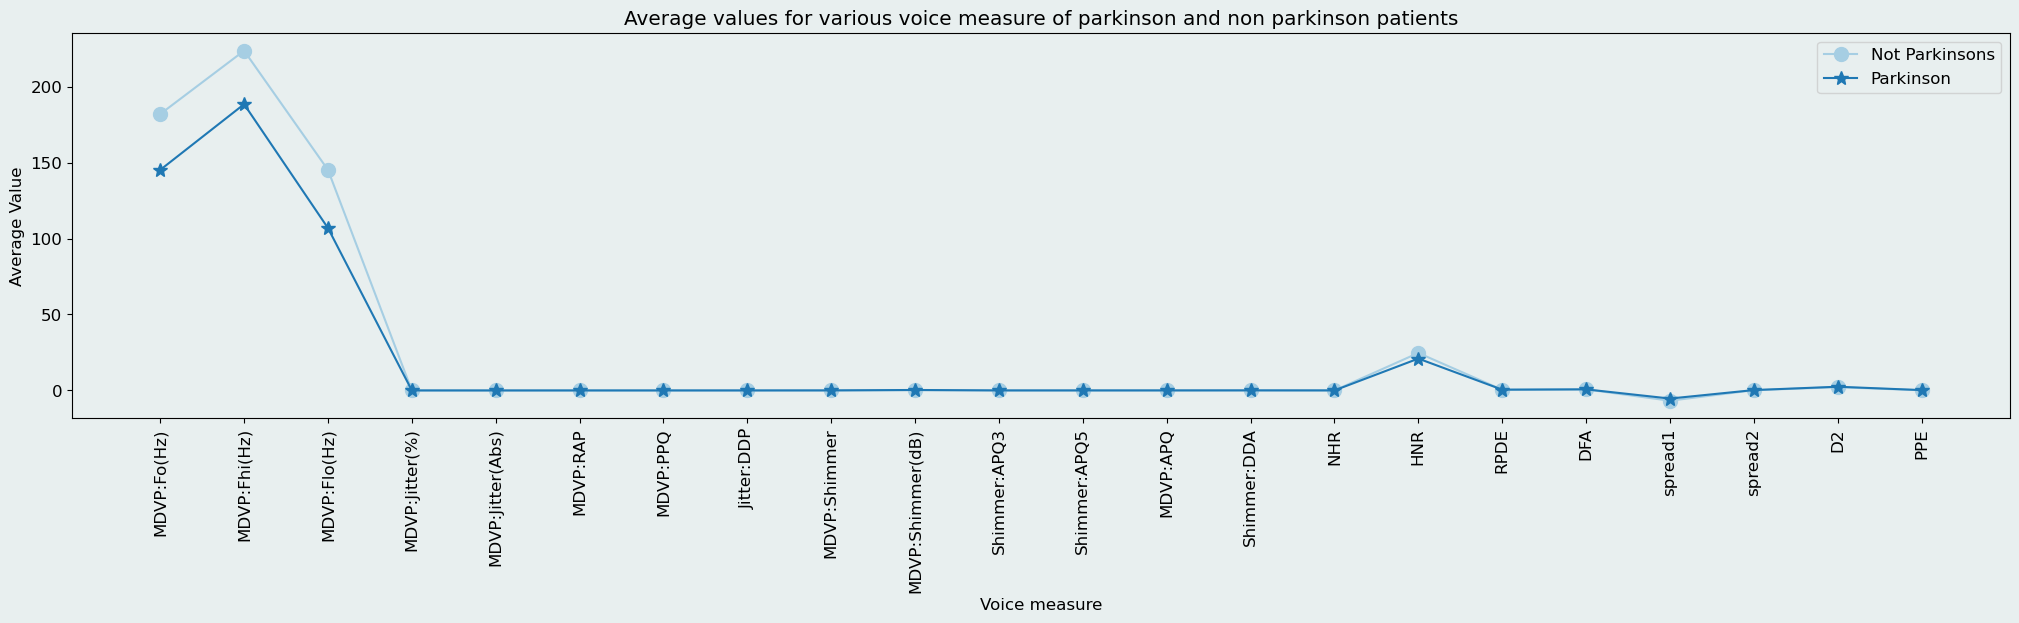

In [15]:
sns.set_palette("Paired")
plt.figure(figsize=(25,5))
plt.plot(inference.iloc[0,:],marker="o",markersize=10,label="Not Parkinsons")
plt.plot(inference.iloc[1,:],marker="*",markersize=10,label="Parkinson")
plt.xticks(rotation=90)
plt.xlabel("Voice measure")
plt.ylabel("Average Value")
plt.title("Average values for various voice measure of parkinson and non parkinson patients")
plt.legend();

In [16]:
X = df.drop(["status"],axis=1).copy()
y = df["status"].copy()

#### Model Imports

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#### Feature Selection imports

In [18]:
from sklearn.feature_selection import mutual_info_classif # For variance thresholding
from skfeature.function.similarity_based import fisher_score # For Fischer Similarity
from sklearn.feature_selection import VarianceThreshold # For vairance thresholding
from sklearn.preprocessing import MinMaxScaler # For scaling the value
from sklearn.model_selection import GridSearchCV # For Grid Search CV
from mlxtend.feature_selection import SequentialFeatureSelector # For exhaustive Feature Selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector # For exhaustive Feature Selection

## FEATURE SELECTION

## Filter Methods

#### Information Gain

In [19]:
# This function takes X , y and threshold as input and returns the features with information gain greater than threshold
def information_gain(X,y,threshold):
    importances = mutual_info_classif(X,y)
    feature_importance = pd.Series(importances,X.columns)
    # Returns the feature with maximum to mimimum importance
    return feature_importance>threshold

#### Fisher's Score

In [20]:
def FisherScore(X,y):
    # Calculating scores
    ranks = fisher_score.fisher_score(X,y)
    # Plotting the ranks
    feature_importances = pd.Series(ranks,X.columns)
    return feature_importances

#### Variance Threshold

In [21]:
def varianceThreshold(X,y,threshold):
    X_scaled = MinMaxScaler().fit_transform(X)
    sel = VarianceThreshold(threshold=threshold)
    sel.fit(X)
    return sel.get_support()

#### GridSearchCV

In [22]:
def gridsearchCV(estimator,features_,):
    gridSearchModel = GridSearchCV(estimator = estimator,
                                   param_grid = features_,
                                   verbose = 2,
                                   cv=4,
                                   n_jobs=-1,
                                   scoring="accuracy")
    return gridSearchModel

## Wrapper Methods

#### Exhaustive Feature Selection

In [23]:
# # This feature selection technique does all the combination of the feature, trains the model then choose only those features having best score for the model.
# # This feature selection is memory hungry. So it is tideous job for the machie to process the combination of every single feature
# # def exhaustive():
# selectedColumns = varianceThreshold(X,y,0.005) #Calling variance threshodl function to return selected feature mask
# n_features = sum(selectedColumns)
# X_new = X[X.columns[selectedColumns]]
# efs = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
#                                                            min_features = 1,
#                                                            max_features=10,
#                                                            scoring = "accuracy",
#                                                            cv=2,
#                                                            n_jobs=-1).fit(X_new,y)
    


In [24]:
# efs.best_features_names_

In [25]:
# efs.best_score_

## MODELS

#### KNN

#### Random Forest

In [26]:
def randomForest_():
    randomForestmodel = RandomForestClassifier(criterion="gini",
                                               random_state=0,
                                               n_jobs=-1,
                                               oob_score=True)
    features = dict(max_depth= [2,3,5,10,20],
    min_samples_leaf= [5,10,20,50,100,200],
    n_estimators= [10,25,30,50,100,200])
    model = gridsearchCV(randomForestmodel,features)
    return model

#### Logistic Model

In [27]:
def logistic():
    Logisticmodel = LogisticRegression(max_iter=1000)
    features_ = dict(C = [0.001,0.01,0.1,1,10,100],
                     solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    model = gridsearchCV(Logisticmodel,features_)
    return model

#### Decision Tree

In [28]:
def tree():
    # Making prediction with Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=0)
    features_ = dict(criterion = ["gini","entropy","log_loss"],
                     max_depth= [2,3,5,10,20],
                    min_samples_leaf= [5,10,20,50,100,200])
    model = gridsearchCV(dtc,features_)
    return model

#### Support Vector Machines

In [29]:
def svm():
    svmmodel = SVC(random_state=0)
    features_ = dict(C = [0.001,0.01,0.1,1,10,100],
                     kernel=['linear', 'poly', 'rbf', 'sigmoid'])
    model = gridsearchCV(svmmodel,features_)
    return model

#### Gaussian Naive Bayes

In [30]:
def naive():
    # Making prediction with naive bayes model
    gnb = GaussianNB()
    return gnb

#### Hard Voting Classifier

In [31]:
def hardVoting():
    # Using a voting classifier
    # Creating voting classifier with soft voiting
    votingClassifierHard = VotingClassifier(estimators=[("dtc",DecisionTreeClassifier(criterion='entropy', max_depth= 3, min_samples_leaf= 10)),
                                                ("svm",SVC(c=100,kernel="rbf")),
                                                ("forest",RandomForestClassifier(max_depth = 5, min_samples_leaf = 5, n_estimators = 30))],
                                                voting="hard")

#### Soft Voting Classifier

In [32]:
# Creating a voting classifier with hard voting
votingClassifierSoft = VotingClassifier(estimators=[("dtc",DecisionTreeClassifier(random_state=0)),
                                                ("lr",LogisticRegression()),
                                                ("gnb",GaussianNB())],
                                                voting="soft")

## Analysis

#### F1 score and Accuracy

In [33]:
def analysis(model,X_test,y_test):
    from sklearn.metrics import f1_score,accuracy_score
    return f1_score(y_test,model.predict(X_test)), accuracy_score(y_test,model.predict(X_test))

#### ROC AND AUC Curve

In [34]:
def auc_(model,X_test,y_test):
    return roc_auc_score(y_test,model.predict(X_test))

#### MODEL SELECTION

In [35]:
def modelSelection(X,y):
    """
This section will split the dataset into train and test and create a dataframe for the scoring
    
    """
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y,
                                                     random_state=0,
                                                     stratify = y,
                                                     test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test

In [36]:
# Creating a dataframe for various results
result_ = pd.DataFrame(columns=["model","method","n_features","threshold","f1Score","accuracy","training score","auc","time"])
def result(model,feature_selection_method,f1_score,accuracy,n_features,threshold,trainingScore,auc,time):
    result_.loc[len(result_.index)] = [model,feature_selection_method,n_features,threshold,f1_score,accuracy,trainingScore,auc,time]

### -------VARIANCE THRESHOLD AND MODELS

Outline of how the calculation is being performed
1. Calling one of the <b>feature selection</b> function to fit the feature and stroing in a variable  say <b>"A"</b>
2. Adding the selected features <b>sum(A)</b>
3. Masking the selected feature from the main dataframe
4. Splitting the data into training and testing
5. Applying the model by calling the respective function with training dataset and string in a variable say "B"
6. printing the best parameters gained using grid search cd
7. Calling the <b>analysis</b> function to calculate the f1 score and accuracy of the model
8. Finally calling the result function to make a dataframe about the scoring

In [37]:
def PreditiveModels(X,y,methods,threshold):
        """t0 and t1 are for capturing the training time"""
        
        func = globals()[methods] # This is for calling function by string
        selectedColumns = func(X,y,threshold) #Selecting the columns whose information gain is > 0.1
        n_features = sum(selectedColumns)
        X_new = X[X.columns[selectedColumns]] # Selecting the features with the help of mask
        X_train,X_test,y_train,y_test = modelSelection(X_new,y) # Calling the model selection function to split the model

        
# LOGISTIC REGRESSION
        t0 = time.time()
        logisticModel = logistic().fit(X_train,y_train) # Calling the logistic function to return logistic model
        t1 = time.time()-t0
        print(f"➡️Best model params for Logistic Regression --> {logisticModel.best_params_}")
        # trs_L = Training score for logistic regression 
        trs_L = logisticModel.score(X_train,y_train)
        f1_score_logistic, accuracy_logistic = analysis(logisticModel,X_test,y_test)
        acu_Logistic = auc_(logisticModel,X_test,y_test)
        result("LogisticRegression",methods,f1_score_logistic,accuracy_logistic,n_features,threshold,trs_L,acu_Logistic,t1) # Creating a dataframe for the model
        
# DECISION TREE
        t0 = time.time()
        treeModel = tree().fit(X_train,y_train)
        t1 = time.time()-t0

        print(f"➡️Best model params for Decision Tree --> {treeModel.best_params_}")
        trs_T = treeModel.score(X_train,y_train)
        f1_score_tree, accuracy_tree = analysis(treeModel,X_test,y_test)
        acu_decision_tree = auc_(treeModel,X_test,y_test)
        result("Decison Tree",methods,f1_score_tree,accuracy_tree,n_features,threshold,trs_T,f1_score_tree,t1)

# SUPPORT VECTOR MACHINE
        t0 = time.time()

        svmModel = svm().fit(X_train,y_train)
        t1 = time.time()-t0

        print(f"➡️Best model params for Support Vector Machines --> {svmModel.best_params_}")
        trs_S = svmModel.score(X_train,y_train)
        f1_score_svm, accuracy_svm = analysis(svmModel,X_test,y_test)
        acu_svm = auc_(svmModel,X_test,y_test)
        result("SVM",methods,f1_score_svm,accuracy_svm,n_features,threshold,trs_S,acu_svm,t1) # Creating a dataframe for the model

#RANDOM FOREST
        t0 = time.time()

        randomForestModel = randomForest_().fit(X_train,y_train)
        t1 = time.time()-t0

        print(f"➡️Best model params for Random Forest Classifier --> {randomForestModel.best_params_}")
        trs_R = randomForestModel.score(X_train,y_train)
        f1_score_random, accuracy_random = analysis(randomForestModel,X_test,y_test)
        acu_random_forest = auc_(randomForestModel,X_test,y_test)
        result("Random Forest",methods,f1_score_random,accuracy_random,n_features,threshold,trs_R,acu_random_forest,t1)

#NAIVE BAYES
        t0 = time.time()

        naiveModel = naive().fit(X_train,y_train)
        t1 = time.time()-t0

        trs_N = naiveModel.score(X_train,y_train)
        f1_score_naive, accuracy_naive = analysis(naiveModel,X_test,y_test)
        acu_naive = auc_(naiveModel,X_test,y_test)
        result("Naive Bayes",methods,f1_score_naive,accuracy_naive,n_features,threshold,trs_N,acu_naive,t1)

In [38]:
PreditiveModels(X,y,"information_gain",0.1)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
➡️Best model params for Logistic Regression --> {'C': 0.01, 'solver': 'lbfgs'}
Fitting 4 folds for each of 90 candidates, totalling 360 fits
➡️Best model params for Decision Tree --> {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
Fitting 4 folds for each of 24 candidates, totalling 96 fits
➡️Best model params for Support Vector Machines --> {'C': 10, 'kernel': 'rbf'}
Fitting 4 folds for each of 180 candidates, totalling 720 fits
➡️Best model params for Random Forest Classifier --> {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 10}


In [39]:
PreditiveModels(X,y,"varianceThreshold",0.05)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
➡️Best model params for Logistic Regression --> {'C': 1, 'solver': 'lbfgs'}
Fitting 4 folds for each of 90 candidates, totalling 360 fits
➡️Best model params for Decision Tree --> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
Fitting 4 folds for each of 24 candidates, totalling 96 fits
➡️Best model params for Support Vector Machines --> {'C': 10, 'kernel': 'rbf'}
Fitting 4 folds for each of 180 candidates, totalling 720 fits
➡️Best model params for Random Forest Classifier --> {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 200}


In [40]:
PreditiveModels(X,y,"varianceThreshold",0.01)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
➡️Best model params for Logistic Regression --> {'C': 0.1, 'solver': 'lbfgs'}
Fitting 4 folds for each of 90 candidates, totalling 360 fits
➡️Best model params for Decision Tree --> {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
Fitting 4 folds for each of 24 candidates, totalling 96 fits
➡️Best model params for Support Vector Machines --> {'C': 100, 'kernel': 'rbf'}
Fitting 4 folds for each of 180 candidates, totalling 720 fits
➡️Best model params for Random Forest Classifier --> {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 30}


In [41]:
result_

,model,method,n_features,threshold,f1Score,accuracy,training score,auc,time
0,LogisticRegression,information_gain,16,0.10,0.903226,0.846154,0.852564,0.732759,8.738451
1,Decison Tree,information_gain,16,0.10,0.872727,0.820513,0.929487,0.872727,0.571827
2,SVM,information_gain,16,0.10,0.949153,0.923077,0.929487,0.882759,0.260489
3,Random Forest,information_gain,16,0.10,0.872727,0.820513,0.897436,0.813793,35.422030
4,Naive Bayes,information_gain,16,0.10,0.695652,0.641026,0.724359,0.725862,0.000998
5,LogisticRegression,varianceThreshold,6,0.05,0.857143,0.794872,0.871795,0.763793,0.331694
6,Decison Tree,varianceThreshold,6,0.05,0.950820,0.923077,0.923077,0.950820,0.467708
7,SVM,varianceThreshold,6,0.05,0.949153,0.923077,0.948718,0.882759,0.229073
8,Random Forest,varianceThreshold,6,0.05,0.933333,0.897436,0.948718,0.832759,32.648287
9,Naive Bayes,varianceThreshold,6,0.05,0.821429,0.743590,0.839744,0.696552,0.002003


# ANALYSIS

### WITH INFORMATION GAIN= 0.1

In [42]:
df1 = result_[(result_["method"]=="information_gain")& (result_["threshold"]==0.10)]
df1

,model,method,n_features,threshold,f1Score,accuracy,training score,auc,time
0,LogisticRegression,information_gain,16,0.1,0.903226,0.846154,0.852564,0.732759,8.738451
1,Decison Tree,information_gain,16,0.1,0.872727,0.820513,0.929487,0.872727,0.571827
2,SVM,information_gain,16,0.1,0.949153,0.923077,0.929487,0.882759,0.260489
3,Random Forest,information_gain,16,0.1,0.872727,0.820513,0.897436,0.813793,35.422030
4,Naive Bayes,information_gain,16,0.1,0.695652,0.641026,0.724359,0.725862,0.000998


In [43]:
df1.shape

(5, 9)

In [44]:
def plotting(dataframe_,title1,title2,supertitle):

    sns.set_palette("Paired") # This is for theming palette
    plt.figure(figsize=(25,5)) # Setting up the figure size
    x = np.arange(dataframe_.shape[0]) # For x ticks purpose 


    plt.subplot(1,2,1) # First subplot
    plt.suptitle(supertitle,fontsize=15)

    plt.bar(x,dataframe_["training score"],width=0.3,label="train") # Plotting the line graph for training score
    for index,values in zip(x,dataframe_["training score"]): # This is for adding text to the graph
        plt.text(index-0.1,values/2,f"{values:.2f}",color="#576CBC")

    plt.bar(x+0.3,dataframe_["accuracy"],
            width=0.3,
            label="accuracy")
    for index,values in zip(x,dataframe_["accuracy"]):
        plt.text(index+0.2,values/2,f"{values:.2f}",color="#FFF2CC")

    plt.xticks(x,dataframe_["model"],rotation=50)
    plt.title(title1)
    plt.xlabel("Models")
    plt.ylabel("Training and Testing score")
    plt.legend()


    plt.subplot(1,2,2)


    plt.bar(x,dataframe_["f1Score"],width=0.3,label="f1Score")

    for index,values in zip(x,dataframe_["f1Score"]):
        plt.text(index,values/2,f"{values:.2f}",verticalalignment="bottom",horizontalalignment='center',color="#0B2447",fontsize="small")
    
    plt.bar(x+0.3,dataframe_["auc"],width=0.3,label="auc")

    for index,values in zip(x,dataframe_["auc"]):
        plt.text(index+0.3,values/2,f"{values:.2f}",verticalalignment="bottom",horizontalalignment='center',color="#0B2447",fontsize="small")

    
    plt.xticks(x,dataframe_["model"],rotation=45)
    plt.title(title2)
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.legend()
    plt.show()


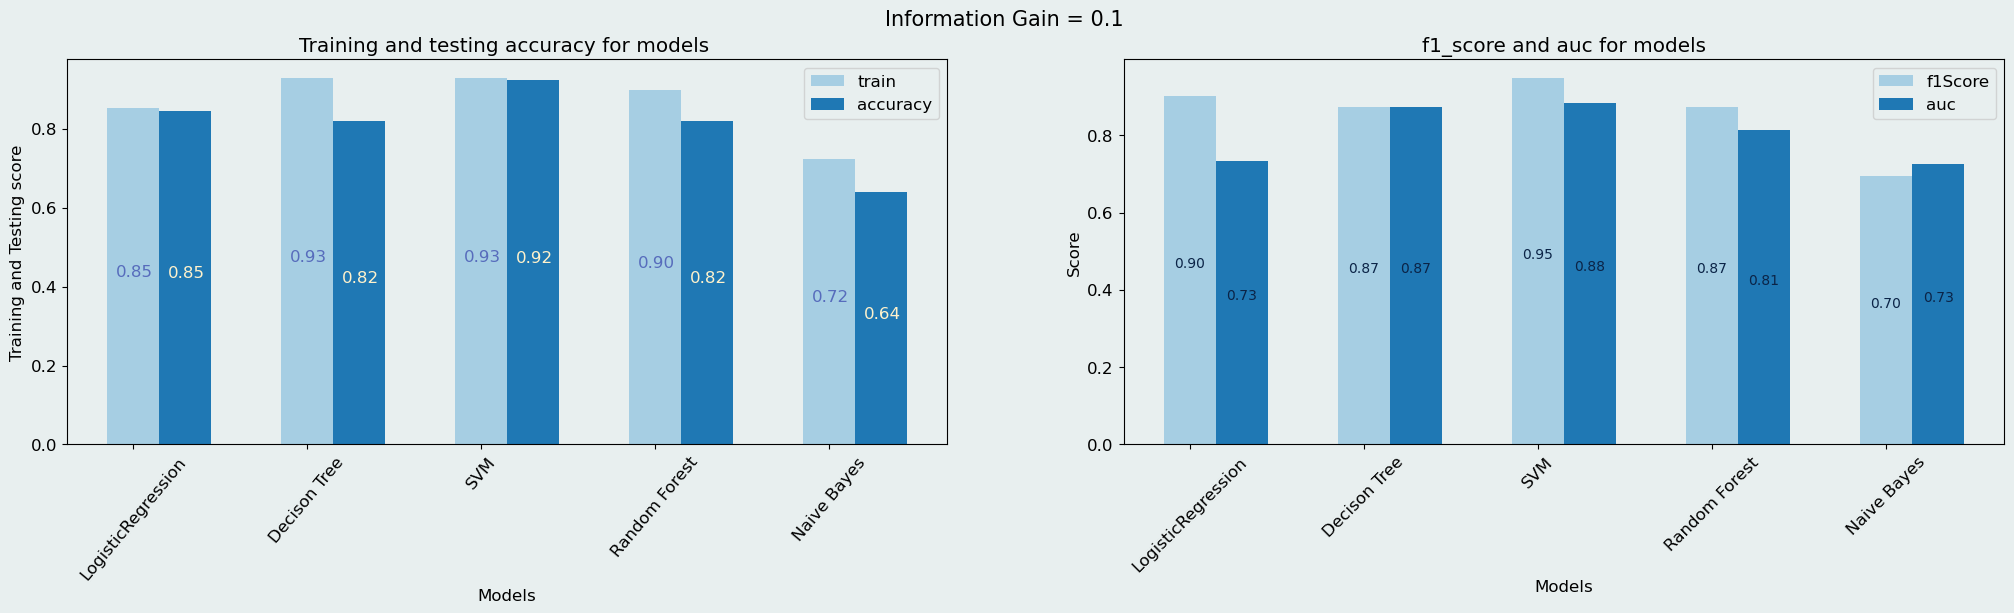

In [45]:
plotting(df1,title1 = "Training and testing accuracy for models ",title2 = "f1_score and auc for models",supertitle="Information Gain = 0.1")

Naive Bayes is the worst performer here \
Decision Tree is clearly overfitting \
<B>Random Forest</B> is doing better job for f1 score and accuracy as well as training and testing score

### VARIANCE THRESHOLD = 0.05

In [46]:
df2 = result_[(result_["method"]=="varianceThreshold")& (result_["threshold"]==0.05)].reset_index(drop=True)
df2

,model,method,n_features,threshold,f1Score,accuracy,training score,auc,time
0,LogisticRegression,varianceThreshold,6,0.05,0.857143,0.794872,0.871795,0.763793,0.331694
1,Decison Tree,varianceThreshold,6,0.05,0.950820,0.923077,0.923077,0.950820,0.467708
2,SVM,varianceThreshold,6,0.05,0.949153,0.923077,0.948718,0.882759,0.229073
3,Random Forest,varianceThreshold,6,0.05,0.933333,0.897436,0.948718,0.832759,32.648287
4,Naive Bayes,varianceThreshold,6,0.05,0.821429,0.743590,0.839744,0.696552,0.002003


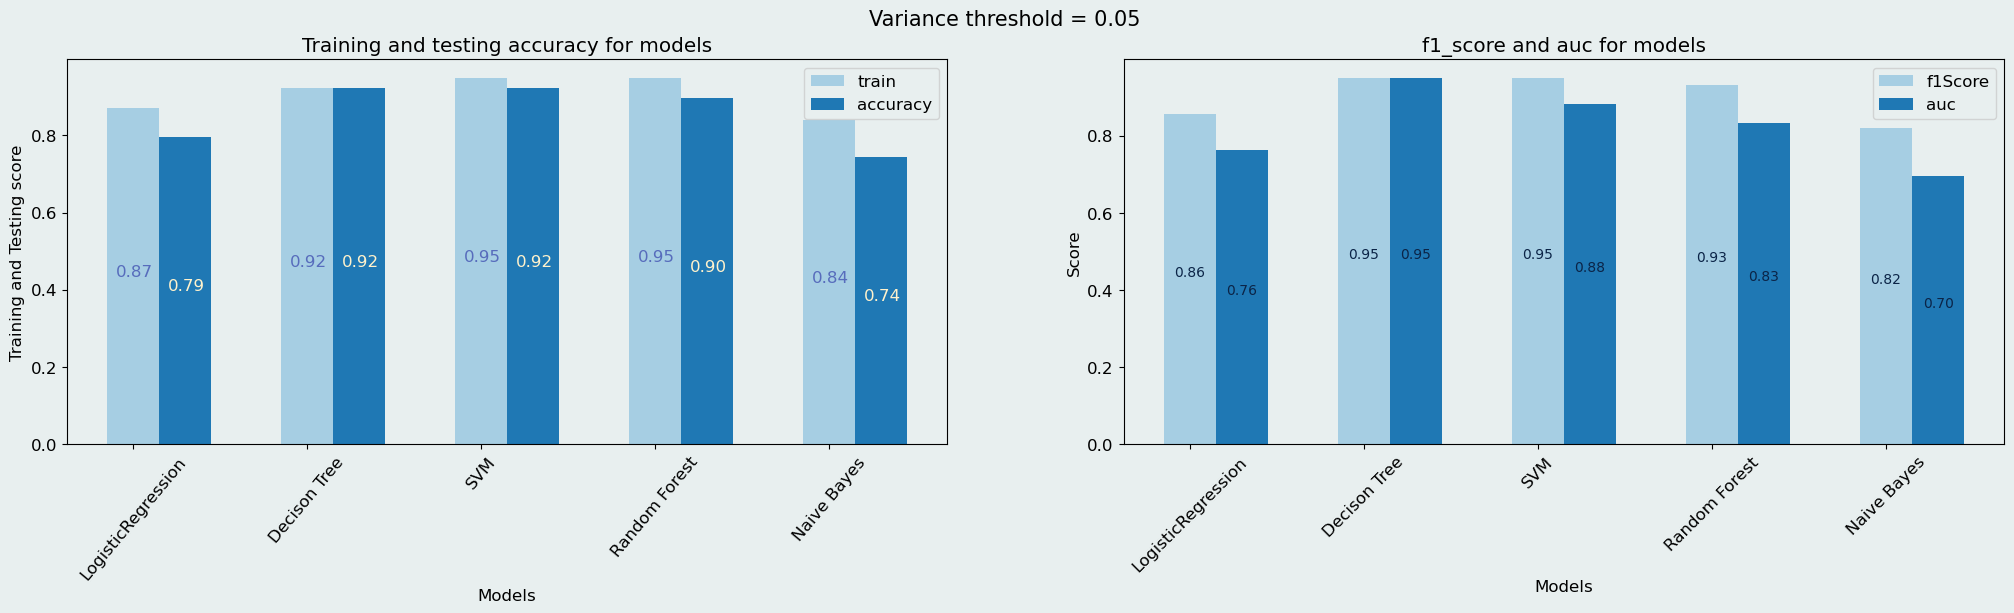

In [47]:
plotting(df2,title1 = "Training and testing accuracy for models",title2 = "f1_score and auc for models",supertitle="Variance threshold = 0.05")

### VARIANCE THRESHOLD = 0.001  

In [48]:
df3 = result_[(result_["method"]=="varianceThreshold") & (result_["threshold"]==0.01)].reset_index(drop=True)
df3

,model,method,n_features,threshold,f1Score,accuracy,training score,auc,time
0,LogisticRegression,varianceThreshold,8,0.01,0.862069,0.794872,0.839744,0.731034,0.337711
1,Decison Tree,varianceThreshold,8,0.01,0.888889,0.846154,0.923077,0.888889,0.511049
2,SVM,varianceThreshold,8,0.01,0.965517,0.948718,1.000000,0.932759,0.223924
3,Random Forest,varianceThreshold,8,0.01,0.915254,0.871795,0.955128,0.815517,32.860130
4,Naive Bayes,varianceThreshold,8,0.01,0.769231,0.692308,0.839744,0.694828,0.001000


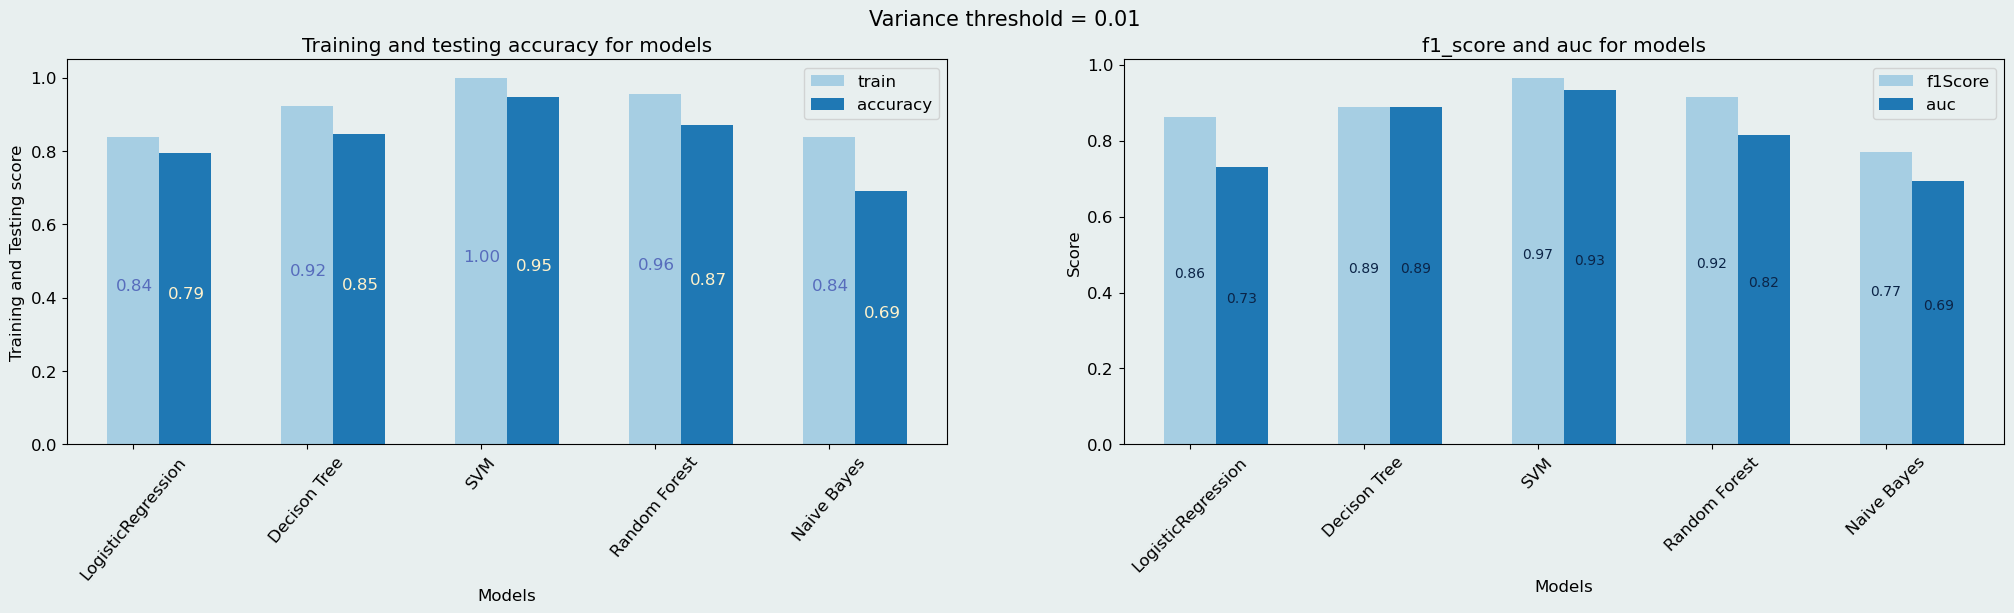

In [49]:
plotting(df3,title1 = "Training and testing accuracy for models",title2 = "f1_score and auc for models",supertitle="Variance threshold = 0.01")

Text(0, 0.5, 'Training time')

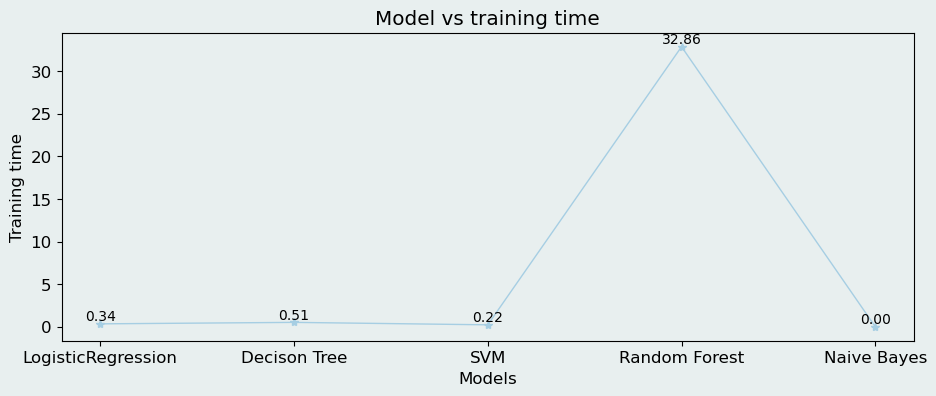

In [50]:
# Plotting the time for every model
plt.figure(figsize=(11,4))
plt.plot(df3["model"],df3["time"],marker="*",lw=1)
for x,val in enumerate(df3["time"]):
    plt.text(x,val,f"{val:.2f}",verticalalignment="bottom",fontsize='small',horizontalalignment="center")
plt.title("Model vs training time")
plt.xlabel("Models")
plt.ylabel("Training time")

The best model so far is SVM with with f1 score 0.97 and auc score 0.93 , also training and testing scores are 1.00 and 0.95 respectively. This is achieved with the help of variance thresholding with threshold of 0.01. Here we can ignore the overfitting problem becuase of the limited number of training data we have and can just focus of f1 score and auc score as our main goal is to maximize them.

### With variance thresholding 0.01 using hardvoting and soft voiting clasifier

In [51]:
selectedColumns = varianceThreshold(X,y,0.01) #Selecting the columns whose information gain is > 0.1
n_features = sum(selectedColumns)
X_new = X[X.columns[selectedColumns]] # Selecting the features with the help of mask
X_train,X_test,y_train,y_test = modelSelection(X_new,y) # Calling the model selection function to split the model

# ENSEMBLE METHODS

### Genetic Algorithm

#### Imports

In [52]:
from genetic_selection import GeneticSelectionCV

In [53]:
#Forms the skeleton model using cross validation and genetic algorithm
def geneticSelection():
    estimator = svm()
    model = GeneticSelectionCV(estimator,
                               cv=5,
                               verbose=3,
                               scoring="f1",
                               max_features=10,
                               n_population=50,
                               crossover_proba=0.5,
                               mutation_proba=0.2,
                               n_generations=50,
                               crossover_independent_proba=0.5,
                               mutation_independent_proba=0.04,
                               tournament_size=3,
                               n_gen_no_change=10,
                               caching=True,
                               n_jobs=-1)
    return model

In [54]:
X_train,X_test,y_train,y_test = modelSelection(X,y)

In [55]:
model = geneticSelection()
model.fit(X_train,y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	100   	[ 0.896133  5.74      0.035016]	[ 0.025546  2.722572  0.011603]	[ 0.831924  1.        0.008085]	[  0.945091  10.         0.071652]
1  	56    	[-499.132436    6.9       500.033291]	[ 2179.648505     2.347339  2179.441834]	[-10000.            1.            0.010341]	[     0.946091     11.        10000.      ]
2  	64    	[-99.08557    7.14     100.033534]   	[ 995.079341    1.949461  994.984067]   	[-10000.            2.            0.010341]	[     0.961658     12.        10000.      ]
3  	54    	[-199.086401    7.39      200.032465]	[ 1400.130514     1.684607  1399.995362]	[-10000.            4.            0.006892]	[     0.961658     12.        10000.      ]
4  	60    	[-299.090519    7.78      300.031694]	[ 1706.032155     1.404137  1705.866637]	[-10000.            4.            0.012211]	[    

GeneticSelectionCV(caching=True, crossover_independent_proba=0.5, cv=5,
                   estimator=GridSearchCV(cv=4, estimator=SVC(random_state=0),
                                          n_jobs=-1,
                                          param_grid={'C': [0.001, 0.01, 0.1, 1,
                                                            10, 100],
                                                      'kernel': ['linear',
                                                                 'poly', 'rbf',
                                                                 'sigmoid']},
                                          scoring='accuracy', verbose=2),
                   max_features=10, mutation_independent_proba=0.04,
                   n_gen_no_change=10, n_generations=50, n_jobs=-1,
                   n_population=100, scoring='f1', verbose=3)

In [56]:
model.support_

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True])

In [57]:
model.score(X_test,y_test)

0.8974358974358975

In [58]:
f1_score(y_test,model.predict(X_test))

0.9259259259259259

In [59]:
auc_(model,X_test,y_test)

0.9310344827586207

### Particle Swarm Optimization

In [95]:
!pip install niapy --pre
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

     ------------------------------------ 181.9/181.9 kB 457.6 kB/s eta 0:00:00


In [96]:
class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [98]:
feature_names = X.columns

In [100]:
problem = SVMFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization(population_size=10, seed=1234)
best_features, best_fitness = algorithm.run(task)

selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

model_selected = SVC(C= 100, kernel = 'rbf')
model_all = SVC(C= 100, kernel = 'rbf')

model_selected.fit(X_train[:, selected_features], y_train)
print('Subset accuracy:', model_selected.score(X_test[:, selected_features], y_test))

model_all.fit(X_train, y_train)
print('All Features Accuracy:', model_all.score(X_test, y_test))

Number of selected features: 12
Selected features: MDVP:Fo(Hz), MDVP:Fhi(Hz), Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:DDA, HNR, DFA, spread1, D2, PPE
Subset accuracy: 0.9230769230769231
All Features Accuracy: 0.9230769230769231


This code defines a fitness_function that takes a particle's position (i.e., feature selection) and evaluates its fitness based on a fixed X and y dataset. It then uses the BinaryPSO optimizer from pyswarms to search for the optimal feature subset. Finally, it returns the selected feature indices. You can customize this code by modifying the fitness function, adjusting the PSO parameters, or using a different optimizer from pyswarms.

## XGBOOST WITHOUT FEATURE SELECTION

In [63]:
from xgboost import XGBClassifier
def XGB(X_train,y_train,X_test,y_test):
  model = XGBClassifier(n_estimators=10,
                        early_stopping_rounds=50,
                        max_depth=6,
                        booster="gbtree")
  model.fit(X_train,y_train,
            eval_set=[(X_train,y_train),(X_test,y_test)],
            verbose=10)
  print(f"Train: {model.score(X_train,y_train)}")
  print(f" test {model.score(X_test,y_test)}")
  print(f"{f1_score(y_test,model.predict(X_test))}")

In [64]:
XGB(X_train,y_train,X_test,y_test)

[0]	validation_0-logloss:0.49316	validation_1-logloss:0.55785
[9]	validation_0-logloss:0.08585	validation_1-logloss:0.31278
Train: 1.0
 test 0.7948717948717948
0.851851851851852


#### WITHOUT FEATURE SELECTION BUT CROSS VALIDATION

In [65]:
model = XGBClassifier(n_estimators=1000,
                      early_stopping_rounds=50,
                      max_depth=4,
                      booster="gbtree"
                    )

In [66]:
score = cross_val_score(model,
                X_train,
                y_train,
                cv=10,
                verbose=5,
                fit_params =dict(eval_set = [(X_train,y_train),(X_test,y_test)],verbose=100))

[0]	validation_0-logloss:0.48639	validation_1-logloss:0.56986
[68]	validation_0-logloss:0.04145	validation_1-logloss:0.27135


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.938) total time=   0.1s
[0]	validation_0-logloss:0.49867	validation_1-logloss:0.56020
[93]	validation_0-logloss:0.03885	validation_1-logloss:0.24134
[CV] END ................................ score: (test=0.938) total time=   0.0s
[0]	validation_0-logloss:0.50488	validation_1-logloss:0.56485


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[100]	validation_0-logloss:0.02312	validation_1-logloss:0.23179
[116]	validation_0-logloss:0.02201	validation_1-logloss:0.23601
[CV] END ................................ score: (test=1.000) total time=   0.1s
[0]	validation_0-logloss:0.51194	validation_1-logloss:0.57354


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[100]	validation_0-logloss:0.04932	validation_1-logloss:0.22655
[104]	validation_0-logloss:0.04902	validation_1-logloss:0.22637
[CV] END ................................ score: (test=0.812) total time=   0.2s
[0]	validation_0-logloss:0.51219	validation_1-logloss:0.58848
[100]	validation_0-logloss:0.01983	validation_1-logloss:0.22816
[110]	validation_0-logloss:0.01913	validation_1-logloss:0.23201
[CV] END ................................ score: (test=1.000) total time=   0.1s
[0]	validation_0-logloss:0.49955	validation_1-logloss:0.55595


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[83]	validation_0-logloss:0.05941	validation_1-logloss:0.22810
[CV] END ................................ score: (test=0.812) total time=   0.0s
[0]	validation_0-logloss:0.50488	validation_1-logloss:0.55998
[68]	validation_0-logloss:0.04696	validation_1-logloss:0.27029
[CV] END ................................ score: (test=0.933) total time=   0.1s
[0]	validation_0-logloss:0.49602	validation_1-logloss:0.56718
[100]	validation_0-logloss:0.02041	validation_1-logloss:0.22542
[CV] END ................................ score: (test=1.000) total time=   0.0s
[0]	validation_0-logloss:0.50028	validation_1-logloss:0.56923
[61]	validation_0-logloss:0.06035	validation_1-logloss:0.28695
[CV] END ................................ score: (test=0.733) total time=   0.0s
[0]	validation_0-logloss:0.51069	validation_1-logloss:0.56076
[66]	validation_0-logloss:0.07929	validation_1-logloss:0.30328
[CV] END ................................ score: (test=0.867) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished


In [67]:
score.mean()

0.9033333333333333

## XGBOOST WITH FEATURE SELECTION

#### WITH VARIANCE THRESHOLD 0.05

#### ADABOOST WITHOUT FEATURE SELECTION

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
model = RandomForestClassifier(criterion='entropy', max_depth= 10, min_samples_leaf = 5)
adaBoost = AdaBoostClassifier(model,
                              n_estimators=1000,
                              random_state=0)
adaBoost.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=5),
                   n_estimators=1000, random_state=0)

In [70]:
adaBoost.score(X_train,y_train)

0.9935897435897436

In [71]:
adaBoost.score(X_test,y_test)

0.9230769230769231

In [72]:
f1_score(y_test,adaBoost.predict(X_test))

0.9491525423728815

In [73]:
auc_(adaBoost,X_test,y_test)

0.8827586206896553

#### ADABOOST WITH FEATURE SELECTION

### Gradient Boosting Classifier WITHOUT FEATURE SELECTION

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gradient = GradientBoostingClassifier(n_estimators=20,
                                      max_depth=20,
                                      learning_rate=0.1,
                                      random_state=42,
                                      verbose=100)

In [76]:
gradient.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9208            0.08s
         2           0.7851            0.05s
         3           0.6792            0.05s
         4           0.5931            0.05s
         5           0.5213            0.04s
         6           0.4604            0.04s
         7           0.4081            0.04s
         8           0.3628            0.03s
         9           0.3233            0.03s
        10           0.2887            0.03s
        11           0.2582            0.02s
        12           0.2313            0.02s
        13           0.2074            0.02s
        14           0.1862            0.02s
        15           0.1673            0.01s
        16           0.1504            0.01s
        17           0.1354            0.01s
        18           0.1219            0.01s
        19           0.1098            0.00s
        20           0.0989            0.00s


GradientBoostingClassifier(max_depth=20, n_estimators=20, random_state=42,
                           verbose=100)

In [77]:
gradient.score(X_train,y_train)

1.0

In [78]:
gradient.score(X_test,y_test)

0.7435897435897436

In [79]:
from antsys import AntWorld
from antsys import AntSystem

In [80]:
def antColonySelection(X,y):
    return